In [365]:
import pandas as pd
import numpy as np

df = pd.read_csv("flavors_of_cacao.csv")
df.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [366]:
df["Broad Bean\nOrigin"].value_counts().head(20)

Venezuela             214
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
                       73
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Papua New Guinea       42
Colombia               40
Costa Rica             38
Vietnam                38
Tanzania               34
Ghana                  33
Trinidad               33
Mexico                 30
Guatemala              28
Hawaii                 28
Name: Broad Bean\nOrigin, dtype: int64

## Mapping Bean Origin vs Rating

In [225]:
import plotly.plotly as py
%matplotlib inline

In [372]:
counts = pd.DataFrame(df["Broad Bean\nOrigin"].value_counts())
counts = counts[counts["Broad Bean\nOrigin"] > 10]
counts = counts[counts["Broad Bean\nOrigin"] != 73]
counts

,Broad Bean Origin
Venezuela,214
Ecuador,193
Peru,165
Madagascar,145
Dominican Republic,141
Nicaragua,60
Brazil,58
Bolivia,57
Belize,49
Papua New Guinea,42


In [227]:
ratings = df.groupby(['Broad Bean\nOrigin'], as_index=False).mean()
ratings["Rating"] = np.round(ratings["Rating"], decimals=2)

ratings = ratings.drop(["REF", "Review\nDate"], axis=1)
ratings.head()

,Broad Bean Origin,Rating
0,"Africa, Carribean, C. Am.",2.75
1,Australia,3.25
2,Belize,3.23
3,Bolivia,3.20
4,Brazil,3.28


In [155]:
reviews = counts.join(ratings.set_index("Broad Bean\nOrigin"))
reviews["Country"] = reviews.index
reviews.head()

,Broad Bean Origin,Rating,Country
Venezuela,214,3.25,Venezuela
Ecuador,193,3.13,Ecuador
Peru,165,3.14,Peru
Madagascar,145,3.27,Madagascar
Dominican Republic,141,3.21,Dominican Republic


In [327]:
import pycountry

def get_country(name):
#     print(name)
    mappings = {
        "Venezuela": "Venezuela, Bolivarian Republic of",
        "Bolivia" : "Venezuela, Bolivarian Republic of",
        "Vietnam": "Viet Nam",
        "Tanzania": "Tanzania, United Republic of",
        "Trinidad": "Trinidad and Tobago",
        "Hawaii": "United States Minor Outlying Islands",
        "Domincan Republic": "Dominican Republic",
        "Sao Tome": "Sao Tome and Principe",
        "Sao Tome & Principe": "Sao Tome and Principe",
        "Burma": "Myanmar",
        "Dominican Rep., Bali": "Dominican Republic",
        "Ivory Coast": "Côte d'Ivoire",
        "U.S.A.": "United States",
        "U.K.": "United Kingdom",
        "Scotland": "United Kingdom",
        "Amsterdam":"Netherlands",
        "South Korea": "Korea, Republic of",
        "Carribean": "Dominican Republic",
        "St. Lucia": "Saint Lucia"
    }

    if name in mappings.keys():
        name = mappings[name]
    code = ""
    
    try:
        code = pycountry.countries.get(name=name).alpha_3
    except KeyError:
        print('I got a KeyError on', name)
        return None
    return code

reviews["CODE"] = reviews["Country"].apply(get_country)
reviews.head()

,Broad Bean Origin,Rating,Country,CODE
Venezuela,214,3.25,Venezuela,VEN
Ecuador,193,3.13,Ecuador,ECU
Peru,165,3.14,Peru,PER
Madagascar,145,3.27,Madagascar,MDG
Dominican Republic,141,3.21,Dominican Republic,DOM


In [322]:
import colorlover as cl
ryb = cl.scales['5']['seq']["Reds"]; ryb
scale = np.asarray(list(range(1, len(ryb) + 1)))/5
# colorscale = list(zip(scale, ryb))

full = []
for i in range(len(scale)):
    print([scale[i], ryb[i]])
    full.append([scale[i], ryb[i]])
    
full

[0.20000000000000001, 'rgb(254,229,217)']
[0.40000000000000002, 'rgb(252,174,145)']
[0.59999999999999998, 'rgb(251,106,74)']
[0.80000000000000004, 'rgb(222,45,38)']
[1.0, 'rgb(165,15,21)']


[[0.20000000000000001, 'rgb(254,229,217)'],
 [0.40000000000000002, 'rgb(252,174,145)'],
 [0.59999999999999998, 'rgb(251,106,74)'],
 [0.80000000000000004, 'rgb(222,45,38)'],
 [1.0, 'rgb(165,15,21)']]

In [367]:
data = [ dict(
        type = 'choropleth',
        locations = reviews['CODE'],
        z = reviews['Rating'],
        text = reviews['Country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Rating'),
      ) ]

layout = dict(
    title = 'Ratings of Cocoa Sourced from Around the World',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

## Line Mapping

In [346]:
to_from = df[df["Broad Bean\nOrigin"]!="\xa0"]
to_from = to_from[to_from["Broad Bean\nOrigin"].str.contains(",") == False]

to_from["from"] = to_from["Broad Bean\nOrigin"].apply(get_country)
to_from["to"] = to_from["Company\nLocation"].apply(get_country)

to_from = to_from[["to", "from"]].dropna()

I got a KeyError on West Africa
I got a KeyError on West Africa
I got a KeyError on Tobago
I got a KeyError on Trinidad-Tobago
I got a KeyError on South America
I got a KeyError on West Africa
I got a KeyError on South America
I got a KeyError on Venezuela/ Ghana
I got a KeyError on Principe
I got a KeyError on Central and S. America
I got a KeyError on Central and S. America
I got a KeyError on Carribean(DR/Jam/Tri)
I got a KeyError on Ghana & Madagascar
I got a KeyError on Madagascar & Ecuador
I got a KeyError on West Africa
I got a KeyError on Tobago
I got a KeyError on West Africa
I got a KeyError on West Africa
I got a KeyError on South America
I got a KeyError on Central and S. America
I got a KeyError on Central and S. America
I got a KeyError on Wales
I got a KeyError on Russia
I got a KeyError on Czech Republic
I got a KeyError on Niacragua
I got a KeyError on Eucador


In [350]:
print(len(to_from))
to_from.head()

1655


,to,from
0,FRA,STP
1,FRA,TGO
2,FRA,TGO
3,FRA,TGO
4,FRA,PER


In [401]:
occurences = pd.DataFrame(to_from.groupby(to_from.columns.tolist(),
                                          as_index=False).size().reset_index().rename(columns={0:'count'}))
occurences.describe()

,count
count,314.000000
mean,5.270701
std,12.065316
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,113.000000


In [403]:
occurences.head()

,to,from,count
0,ARG,BRA,1
1,ARG,ECU,3
2,ARG,VEN,5
3,AUS,AUS,3
4,AUS,BLZ,1


In [355]:
all_locations = set(to_from["from"]).union(set(to_from["to"]))
to_from.describe()

,to,from
count,1655,1655
unique,52,49
top,USA,VEN
freq,712,271


In [442]:
bean_sources = [ dict(
        type = 'scattergeo',
        locations = all_locations,
        hoverinfo = 'text',
        mode = 'markers',
        marker = dict( 
            size=2, 
            color='rgb(222,205,164)',
            line = dict(
                width=3,
                color='rgba(68, 68, 68, 0)'
            )
        ))]

flight_paths = []
max_count = occurences["count"].max()

for index, row in occurences.iterrows():
#     print(row["from"], row["to"])
    if row["count"] > max_count/4:
        op = 1
    else:
        op = row["count"]/(max_count/4)
    
    flight_paths.append(
        dict(
            type = 'scattergeo',
            locations = [row["from"], row["to"]],
            mode = 'lines',
            line = dict(
                width = 1,
                color = 'rgb(217,142,78)',
            ),
            opacity = 1,
        )
    )

background = "rgb(78,72,58)"
    
layout = dict(
        title = 'Sourced Beans to Company Country',
        showlegend = False, 
        geo = dict(
            projection=dict( type='Mercator' ),
            showland = True,
            showframe = False,
            landcolor = 'rgb(222,205,164)',
            countrycolor = 'rgb(222,205,164)',
            showlakes = True,
            lakecolor = background,
            bgcolor= background,
            oceancolor = background,
            coastlinecolor = "rgba(0,0,0,0)"
        ),
        width=1600, height=1280,
    )
    
fig = dict( data=flight_paths, layout=layout )

py.image.save_as(fig,'source_map.png')

py.iplot( fig, filename='d3-flight-paths', image='png')


## Ratings vs Percent Cocoa

In [516]:
def fix_percent(x):
    x = x.replace("%", "")
    return float(x)/100
    
df["Percent"] = df["Cocoa\nPercent"].apply(fix_percent)
df.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,Fixed Types,Percent
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome,,0.63
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo,,0.70
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo,,0.70
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo,,0.70
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru,,0.70


In [520]:
rating_to_percent = df.groupby(['Rating'], as_index=False).mean()[["Rating", "Percent"]]
rating_to_percent.to_csv("ratings_percent.csv")
rating_to_percent

,Rating,Percent
0,1.00,0.782500
1,1.50,0.848000
2,1.75,0.906667
3,2.00,0.766250
4,2.25,0.740000
5,2.50,0.717913
6,2.75,0.721795
7,3.00,0.717742
8,3.25,0.714125
9,3.50,0.711607


In [269]:
import plotly.graph_objs as go

data = [go.Bar(
            y=rating_to_percent["Rating"],
            x=rating_to_percent["Percent"],
            orientation = 'h'
    )]

layout = go.Layout(
    title='Percent Cocoa of Chocolate Ratings',
    xaxis=dict(title="Percent Cocoa"),
    yaxis=dict(title="Rating")
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

## Where Cocoa Comes From

In [370]:
counts

,Broad Bean Origin
Venezuela,214
Ecuador,193
Peru,165
Madagascar,145
Dominican Republic,141


In [410]:
counts = counts[counts["Broad Bean\nOrigin"] > 22]
labels = counts.index
values = counts["Broad Bean\nOrigin"]

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='cocoa_production_pie')

## Counts


In [412]:
df["Company\xa0\n(Maker-if known)"].value_counts().head(20)

Soma                          47
Bonnat                        27
Fresco                        26
Pralus                        25
A. Morin                      23
Arete                         22
Guittard                      22
Domori                        22
Valrhona                      21
Hotel Chocolat (Coppeneur)    19
Mast Brothers                 18
Coppeneur                     18
Scharffen Berger              17
Zotter                        17
Artisan du Chocolat           16
Rogue                         16
Smooth Chocolator, The        16
Dandelion                     16
Szanto Tibor                  15
Pierre Marcolini              14
Name: Company \n(Maker-if known), dtype: int64

In [467]:
def generalize_bean_type(x):
    if "Criollo" in str(x):
        return "Criollo"
    elif "Trinitario" in str(x):
        return "Trinitario"
    elif "Forastero" in str(x):
        return "Forastero"
    elif "Amazon" in str(x):
        return "Amazon"
    elif x == "\xa0":
        return ""
    return x


df["Fixed Types"] = df["Bean\nType"].apply(generalize_bean_type)

In [468]:
set(list(df["Fixed Types"]))

{'',
 nan,
 'Trinitario',
 'Beniano',
 'Nacional',
 'Criollo',
 'CCN51',
 'Amazon',
 'Nacional (Arriba)',
 'EET',
 'Blend',
 'Forastero',
 'Matina'}

In [487]:
types = df["Fixed Types"].value_counts()
types["Other"] = np.sum(types.tail(7))
types = pd.DataFrame(types)
types = types[types["Fixed Types"] > 19]
types = types[types["Fixed Types"] != 887]
types["Type"] = types.index
types

,Fixed Types,Type
Trinitario,426,Trinitario
Criollo,225,Criollo
Forastero,195,Forastero
Blend,41,Blend
Other,20,Other


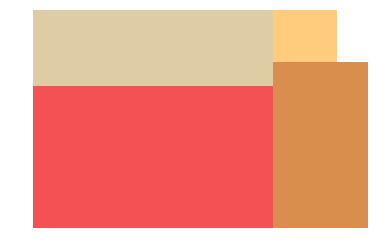

In [514]:
import squarify 
import matplotlib.pyplot as plt
squarify.plot(sizes=types["Fixed Types"],  
              alpha=1, color=["#f45155", '#DECDA4',"#D98E4E", "#ffcb7d", "White",])
plt.axis('off')
plt.savefig("treemap")
plt.show()

In [499]:
import matplotlib

cmap = matplotlib.cm.Blues
mini=0
maxi=5
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
# colors = [cmap(norm(value)) for value in my_values]
cmap(norm(0))

(0.96862745098039216, 0.98431372549019602, 1.0, 1.0)